In [1]:
import bandit as b

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [16]:
numArms = 5
neuronsPerArm = 2
tEpoch = 64
epochs = 50
probabilities = [0, 10, 20, 30, 70]
weights = 1 * np.ones(5, dtype='int')

In [17]:
bandito = b.bandit(numArms, neuronsPerArm, tEpoch, epochs, probabilities=probabilities, weights=weights)
(x,y,z) = bandito.run(epochs)
bandito.stop()

INFO:DRV:  SLURM is being run in background
INFO:DRV:  Connecting to 10.212.98.103:37259
INFO:DRV:      Host server up..............Done 0.15s
INFO:DRV:      Encoding axons/synapses.....Done 6.31ms
INFO:DRV:      Compiling Embedded snips....Done 0.39s
INFO:HST:  Args chip=0 cpu=0 /homes/wolin/python3_venv/lib/python3.5/site-packages/nxsdk/driver/compilers/../../../temp/1574125714.8748908/launcher_chip0_lmt0.bin --chips=1 --remote-relay=1 --epoch=2 
INFO:DRV:      Booting up..................Done 2.63s
INFO:DRV:      Encoding probes.............Done 0.88ms
INFO:HST:  Lakemont_driver...
INFO:DRV:      Transferring spikes.........Done 1.98ms
INFO:DRV:      Transferring probes.........Done 3.39ms
INFO:DRV:      Configuring registers.......Done 0.03s
INFO:DRV:      Executing...................Done 0.45s
INFO:DRV:      Processing timeseries.......Done 0.59s
INFO:DRV:  Executor: 3200 timesteps........Done 1.08s
INFO:HST:  chip=0 cpu=0 halted, status=0x0


In [18]:
p = bandito.get_reward_probes()

In [19]:
lrs = [arm.learningRule for arm in bandito.arms]

In [20]:
[lr.id for lr in lrs]

[0, 1, 2, 3, 4]

In [21]:
x,y

([1, 3, 3, 4, 3, 1, 3, 3, 3, 1, 3, 3, 3, 4, 2, 1, 3, 4, 0, 3, 3, 3, 2, 3, 4, 4, 4, 3, 4, 1, 4, 4, 3, 3, 4, 4, 3, 4, 3, 2, 4, 3, 4, 4, 3, 4, 2, 4, 4, 4],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1])

In [22]:
z

array([[14, 14, 14, 14, 14],
       [11, 11, 11, 11, 11],
       [11, 11, 11, 12, 11],
       [12, 12, 12,  9, 12],
       [ 8,  8,  8, 10,  8],
       [10, 10, 10,  8, 10],
       [ 6,  6,  6, 11,  6],
       [ 8,  8,  8, 12,  8],
       [ 9,  9,  9, 19,  9],
       [10, 10, 10, 10, 10],
       [ 7,  7,  7,  8,  7],
       [10, 10, 10, 14, 10],
       [ 6,  6,  6,  7,  6],
       [ 9,  9,  9,  7,  9],
       [ 9,  9,  9,  8,  9],
       [10, 10, 10, 10, 10],
       [ 9,  9,  9, 13,  9],
       [10, 10, 10,  9, 10],
       [12, 12, 12,  9, 10],
       [10, 10, 10, 11,  6],
       [ 8,  8,  8, 12, 11],
       [ 8,  8,  8, 17, 10],
       [14, 14, 14,  9, 11],
       [10, 10, 10, 14, 12],
       [11, 11, 11,  9, 12],
       [ 8,  8,  8,  9, 10],
       [11, 11, 11, 12, 14],
       [ 6,  6,  6, 12, 10],
       [11, 11, 11, 13, 14],
       [12, 12, 12, 11,  9],
       [10, 11, 10, 13, 13],
       [10,  9, 10,  7, 13],
       [10, 12, 10, 15,  6],
       [ 5, 11,  5, 17, 14],
       [10, 11

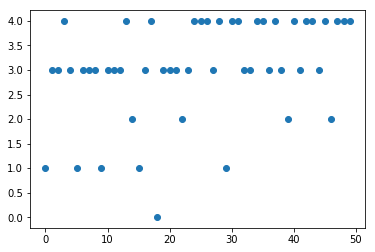

In [23]:
plt.scatter(np.arange(len(x)), x)

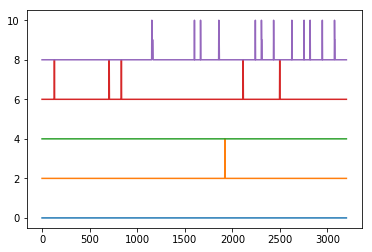

In [24]:
for i in range(numArms):
    data = np.array(p[i][0].data)
    shape = data.shape
    plt.plot((data + np.ones(shape)*2*i))

In [25]:
ws = bandito.get_weights()

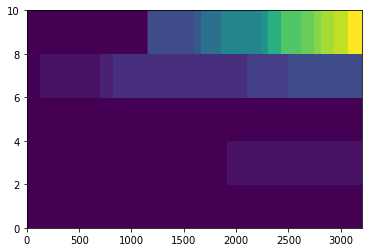

In [26]:
plt.pcolor(np.concatenate(ws, axis=0))